<a href="https://colab.research.google.com/github/asdfasdf0311/kaggle-1/blob/main/prac_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터로드
train = pd.read_csv('/content/drive/MyDrive/ydms/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ydms/titanic/test.csv')
survived = pd.read_csv('/content/drive/MyDrive/ydms/titanic/gender_submission.csv')

In [ ]:
#변수 속성 및 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 12개의 변수
- 총 891개의 데이터
- Age: 177건의 결측치, Cabin: 687건의 결측치, Embarked: 2건의 결측치

# **1. 결측치 처리**

# **1.1 Embarked 변수**

<Axes: ylabel='Embarked'>

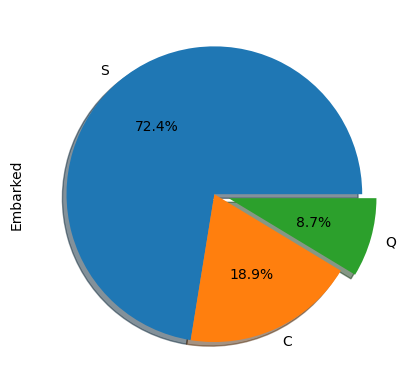

In [ ]:
train['Embarked'].value_counts().plot.pie(explode=[0,0,0.1], autopct='%1.1f%%',shadow=True)

Embarked 변수는 최빈값으로 결측치를 채우도록 하겠다.

In [ ]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [ ]:
train['Embarked'].isnull().sum()

0

# **1.2 Age변수** - 177개결측치

In [ ]:
round(train['Age'].describe(),2)

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

<Axes: xlabel='Age'>

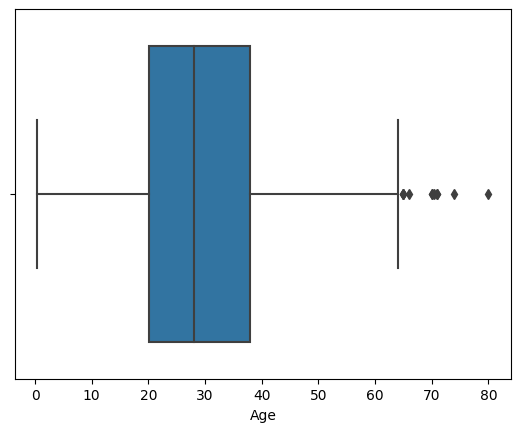

In [ ]:
sns.boxplot(x=train['Age'])

이상치는 존재하지 않는다.

**나이의 결측값 대체는 다른 변수들과의 영향을 고려하여 할당을 해주어야 할 것으로 보인다.**

나의 생각 : Pclass, 성별, 생존율을 이용해서 파생변수 생성 후, 그에 맞는 평균나이로 대체

In [ ]:
train['agemean'] = np.where(
    (train['Pclass'] == 1) & (train['Survived'] == 1) & (train['Sex'] == 'male') & (train['Age'].isnull()), 1,
    np.where(
        (train['Pclass'] == 1) & (train['Survived'] == 0) & (train['Sex'] == 'male') & (train['Age'].isnull()), 2,
        np.where(
            (train['Pclass'] == 2) & (train['Survived'] == 1) & (train['Sex'] == 'male') & (train['Age'].isnull()), 3,
            np.where(
                (train['Pclass'] == 2) & (train['Survived'] == 0) & (train['Sex'] == 'male') & (train['Age'].isnull()), 4,
                np.where(
                    (train['Pclass'] == 3) & (train['Survived'] == 1) & (train['Sex'] == 'male') & (train['Age'].isnull()), 5,
                    np.where(
                        (train['Pclass'] == 3) & (train['Survived'] == 0) & (train['Sex'] == 'male') & (train['Age'].isnull()), 6,
                        np.where(
                            (train['Pclass'] == 1) & (train['Survived'] == 1) & (train['Sex'] == 'female') & (train['Age'].isnull()), 11,
                            np.where(
                                (train['Pclass'] == 1) & (train['Survived'] == 0) & (train['Sex'] == 'female') & (train['Age'].isnull()), 22,
                                np.where(
                                    (train['Pclass'] == 2) & (train['Survived'] == 1) & (train['Sex'] == 'female') & (train['Age'].isnull()), 33,
                                    np.where(
                                        (train['Pclass'] == 2) & (train['Survived'] == 0) & (train['Sex'] == 'female') & (train['Age'].isnull()), 44,
                                        np.where(
                                            (train['Pclass'] == 3) & (train['Survived'] == 1) & (train['Sex'] == 'female') & (train['Age'].isnull()), 55,
                                            np.where(
                                                (train['Pclass'] == 3) & (train['Survived'] == 0) & (train['Sex'] == 'female') & (train['Age'].isnull()), 66, 0
                                            )
                                        )
                                    )
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)

In [ ]:
cnt = train['agemean'].value_counts()
pd.DataFrame(cnt)

,agemean
0,714
6,85
55,25
66,17
2,16
11,9
5,9
4,7
1,5
3,2


0(결측이 아닌 행)이 714개 인것으로 보아 잘 분류가 되었음을 알 수 있다.

In [ ]:
# agemean 값에 따라 Age 결측치 대체
train['Age'] = np.where(train['agemean'] == 1, 31.5,
                        np.where(train['agemean'] == 2, 40.0,
                                 np.where(train['agemean'] == 3, 13.3,
                                          np.where(train['agemean'] == 4, 28.7,
                                                   np.where(train['agemean'] == 5, 17.9,
                                                            np.where(train['agemean'] == 6, 22.9,
                                                                     np.where(train['agemean'] == 11, 30.4,
                                                                              np.where(train['agemean'] == 22, 23.3,
                                                                                       np.where(train['agemean'] == 33, 23.7,
                                                                                                np.where(train['agemean'] == 44, 30.0,
                                                                                                         np.where(train['agemean'] == 55, 14.9,
                                                                                                                  np.where(train['agemean'] == 66, 19.3, train['Age']))))))))))))

In [ ]:
train['Age'].tail()

886    27.0
887    19.0
888    19.3
889    26.0
890    32.0
Name: Age, dtype: float64

888번행의Age는 결측치였는데, 그에 맞는 값(19,3)으로 잘 대체되었음을 알 수 있다.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  agemean      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


이제 Cabin 변수 결측치만 처리하면 된다.

## **1.3 cabin 변수 -> 삭제**

Cabin 변수는 687건의 결측치를 가지고 있다.

우선, cabin변수의 값들은 C53 이런식이므로 첫 알파벳만 따로 빼놓고 그걸로 생존율을 보도록 하겠다. (알파벳이 객실 위치를 나타내는 것일수도 있기 때문)

In [ ]:
train2 = train
train2['Cabin'] = train2['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else x)

In [ ]:
train2['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
cabin_counts = train2['Cabin'].value_counts()
cabin_counts

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<Axes: xlabel='Cabin'>

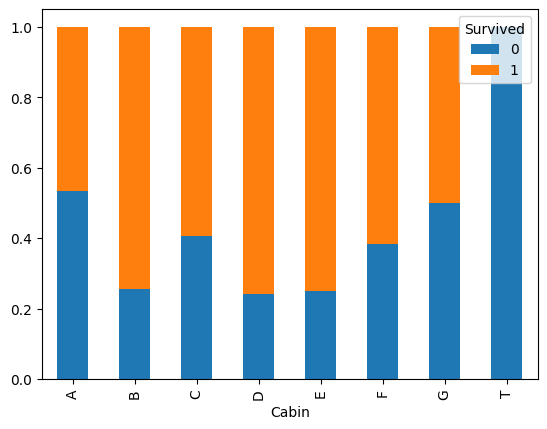

In [ ]:
#객실 번호별 생존유무비율
survived_ratio_by_cabin = train2.groupby('Cabin')['Survived'].value_counts(normalize=True).unstack()
survived_ratio_by_cabin.plot(kind='bar', stacked=True)

객실번호가 B,C,D인 사람들의 생존율이 높음을 볼 수 있다.

사실 이 변수는 진짜 잘 모르겠다. 애초에 결측치도 너무 많고... 그냥 없애버려야겠다.

In [ ]:
train = train.drop('Cabin', axis=1)

아까 임의로 만들었던 agemean도 삭제

In [ ]:
train = train.drop('agemean', axis=1)

# **2. 파생변수 생성**
# **2.1 Sibsb + Parch = Family**

앞 과정에서 혼자탓거나, 가족수(Family)가 4명이상이면 거의 사망한다는 결과를 보았다.

Family변수를 생성하고, Sibsp와 Parch 변수는 일단 내비두는것이 좋을 것으로 보임.

In [ ]:
train['Family'] = train['SibSp'] + train['Parch']
#train = train.drop('SibSp', axis=1)
#train = train.drop('Parch', axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


# **2.2 동행자 유무 변수 train['JoinWith'] 추가**
*   Family가 1 이상이면(동행자와 함께탑승) -> 1
*   Family가 0 이면(동행자없이 혼자탑승) -> 0

In [ ]:
train['JoinWith'] = 0
# 'Family'가 1 이상인 행에 대해 'JoinWith'를 1로 설정
train.loc[train['Family'] >= 1, 'JoinWith'] = 1

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,JoinWith
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


잘 처리가 되었다.

# **2.3 변수명 Name -> FamilyName으로 변경**
Name변수에서 성씨만 남겨두도록 하겠다.

In [ ]:
train['FamilyName'] = train['Name'].apply(lambda x: x.split(',')[0].strip())

# 결과 확인
print(train[['Name', 'FamilyName']])

                                                  Name FamilyName
0                              Braund, Mr. Owen Harris     Braund
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    Cumings
2                               Heikkinen, Miss. Laina  Heikkinen
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle
4                             Allen, Mr. William Henry      Allen
..                                                 ...        ...
886                              Montvila, Rev. Juozas   Montvila
887                       Graham, Miss. Margaret Edith     Graham
888           Johnston, Miss. Catherine Helen "Carrie"   Johnston
889                              Behr, Mr. Karl Howell       Behr
890                                Dooley, Mr. Patrick     Dooley

[891 rows x 2 columns]


# **2.4 Mr, Miss 이용해서 Title(호칭) 변수 생성**

In [ ]:
import re

train['Title'] = train['Name'].apply(lambda x: re.search(',\s(.*?)\.', x).group(1) if re.search(',\s(.*?)\.', x) else '')

# 결과 확인
print(train[['Name', 'Title']])

                                                  Name Title
0                              Braund, Mr. Owen Harris    Mr
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                               Heikkinen, Miss. Laina  Miss
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                             Allen, Mr. William Henry    Mr
..                                                 ...   ...
886                              Montvila, Rev. Juozas   Rev
887                       Graham, Miss. Margaret Edith  Miss
888           Johnston, Miss. Catherine Helen "Carrie"  Miss
889                              Behr, Mr. Karl Howell    Mr
890                                Dooley, Mr. Patrick    Mr

[891 rows x 2 columns]


In [ ]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

Dr부터 Jonkheer은 개수가 매우 작다. 그래서 뭔지 찾아보았다.

Dr = 박사 / Rev = 신부님 / Mlle = 아가씨 / Major = 소령 / Col = 대령 / the Countess = 백작부인 / Ms = miss / Capt = 캡틴 / Sir = Mr / Lady = miss / Mme = 마담(Mrs) / Don = Mr / Jonkheer = Mr

test변수에는 확인해본 결과 Dona라는 title도 존재하였다. Dona = Mrs

# **2.4.1 Title변수 값 축소화**

In [ ]:
#Mlle, Ms, Lady -> Miss
#the Countess, Mme, Dona -> Mrs
#Dr, Rev, Major, Col, Capt, Sir, Don, Jonkheer -> Mr

# 호칭 변경 규칙에 따라 새로운 'Title' 값을 생성
title_mapping = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Lady': 'Miss',
    'the Countess': 'Mrs',
    'Mme': 'Mrs',
    'Dona': 'Mrs',
    'Dr': 'Mr',
    'Rev': 'Mr',
    'Major': 'Mr',
    'Col': 'Mr',
    'Sir': 'Mr',
    'Don': 'Mr',
    'Jonkheer': 'Mr',
    'Capt': 'Mr',
}

# 새로운 'Title' 값이 Mr, Mrs, Miss, Master가 아닌 경우에만 규칙에 따라 변경
train['Title'] = train['Title'].apply(lambda x: title_mapping[x] if x not in ['Mr', 'Mrs', 'Miss', 'Master'] else x)

In [ ]:
train['Title'].value_counts()

Mr        538
Miss      186
Mrs       127
Master     40
Name: Title, dtype: int64

# **2.5 PassengerId, Name, Ticket변수 삭제**

In [ ]:
train = train.drop('PassengerId', axis=1)

In [ ]:
train = train.drop('Name', axis=1)

In [ ]:
train = train.drop('Ticket', axis=1)

# **2.6 Baby변수 생성**
아기 생존율이 높았다. 10세 이하는 모두 Baby=1로 처리 (최종에서는 5세 이하로 변경)

In [ ]:
train['Baby'] = (train['Age'] < 10).astype(int)

# **2.7 RichWoman변수 생성**
1,2등석 여성은 거의 무조건 생존하는 시각화결과가 있었기 때문에 1과 0으로 판별

In [ ]:
# "RichWoman" 변수 생성
train['RichWoman'] = ((train['Pclass'].isin([1, 2])) & (train['Sex'] == 'female')).astype(int)

# **2.8 BigFamily변수 생성**
저번에 했던 시각화에서 Family변수가 4 이상이면 거의 사망하는 결과를 보여주었다. 4명이상이면 1을 할당하고 그 외의 값들은 0을 할당하는 변수 생성

In [ ]:
train['BigFamily'] = (train['Family'] >= 4).astype(int)

     Family  BigFamily
0         1          0
1         1          0
2         0          0
3         1          0
4         0          0
..      ...        ...
886       0          0
887       0          0
888       3          0
889       0          0
890       0          0

[891 rows x 2 columns]


# **3. object형 변수를 수치형으로 변환**

# **3.1 Sex변수를 0과 1로 바꾸어 주도록 하겠다.**

In [ ]:
train.replace({'male': 1, 'female': 0}, inplace=True)

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,JoinWith,FamilyName,Title,Baby,RichWoman
886,887,0,2,1,27.0,0,0,2.639057,S,0,0,Montvila,Mr,0,0
887,888,1,1,0,19.0,0,0,3.433987,S,0,0,Graham,Miss,0,1
888,889,0,3,0,19.3,1,2,3.196630,S,3,1,Johnston,Miss,0,0
889,890,1,1,1,26.0,0,0,3.433987,C,0,0,Behr,Mr,0,0
890,891,0,3,1,32.0,0,0,2.169054,Q,0,0,Dooley,Mr,0,0


# **3.2 Embarked, Title 변수 수치화(one-hot encoding)**

In [ ]:
# 원-핫 인코딩 수행
embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')
title_dummies = pd.get_dummies(train['Title'], prefix='Title')

# 기존 데이터프레임에 원-핫 인코딩 결과를 병합
train = pd.concat([train, embarked_dummies, title_dummies], axis=1)

In [ ]:
#변수삭제
train = train.drop('Embarked', axis=1)
train = train.drop('Title', axis=1)

# **3.3 Fare 변수 로그화**

In [ ]:
train['Fare'] = np.log1p(train['Fare'])

**Survived와 모든 변수간 상관관계 확인**

In [ ]:
train.corr().abs()[["Survived"]]

<ipython-input-139-e8dde1afb5cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().abs()[["Survived"]]


,Survived
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.080909
SibSp,0.035322
Parch,0.081629
Fare,0.329862
Family,0.016639
JoinWith,0.203367
Baby,0.128812


<ipython-input-140-047caf667d6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(train.corr(), annot = True, cmap = 'RdYlBu_r', vmin=-1, vmax=1, figsize=(12,12))


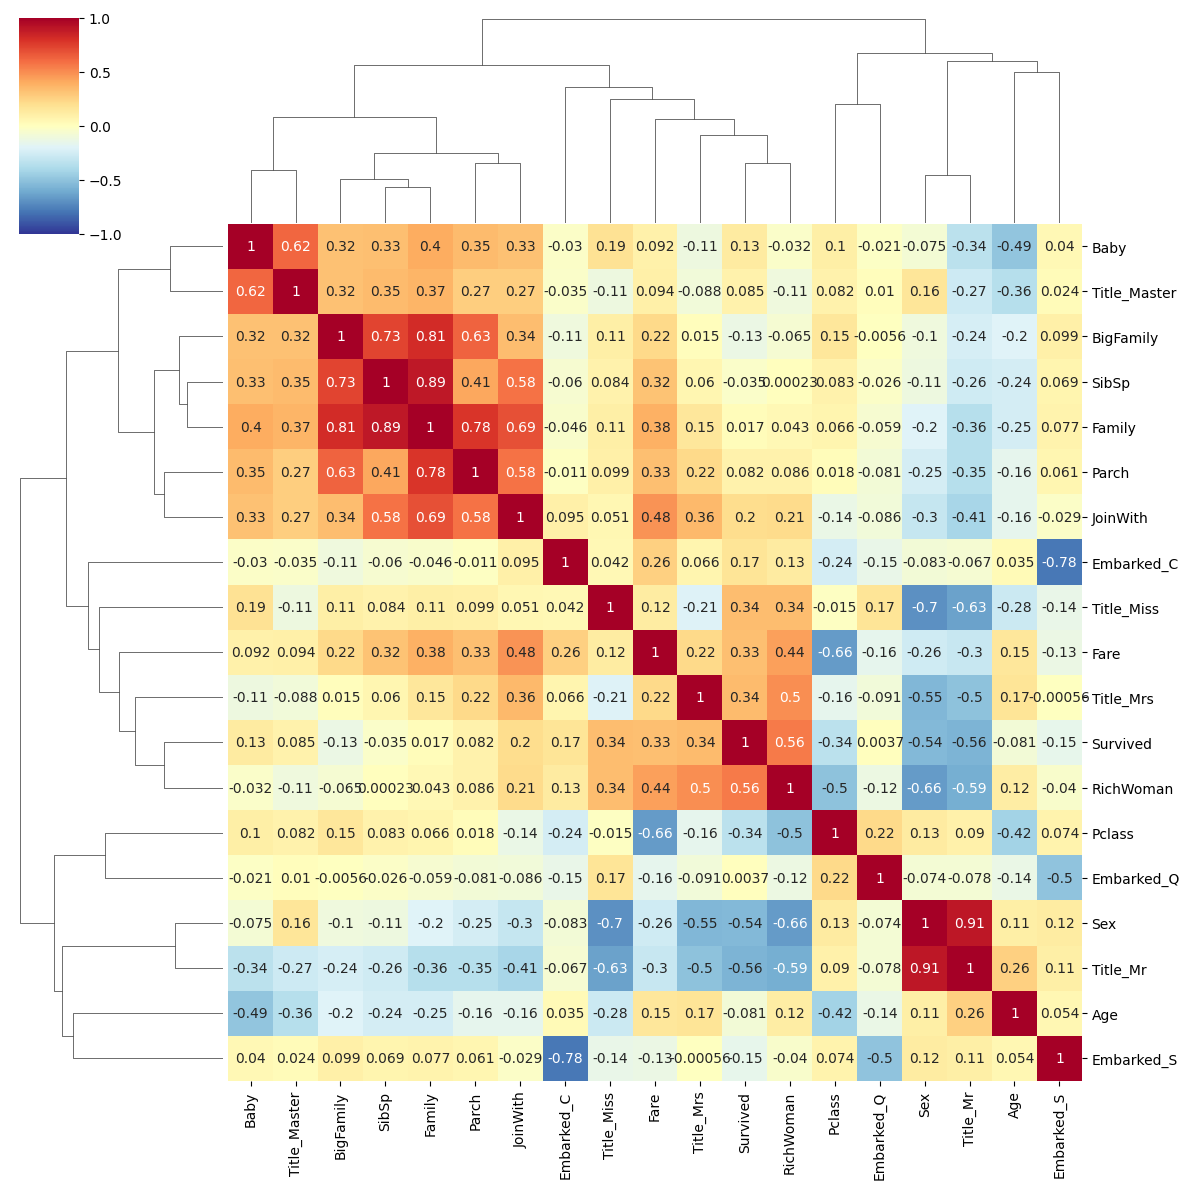

In [ ]:
#상관계수 히트맵 시각화
sns.clustermap(train.corr(), annot = True, cmap = 'RdYlBu_r', vmin=-1, vmax=1, figsize=(12,12))

Title_Miss(0.34), Fare(0.33), Title_Mrs(0.34), RichWoman(0.56), Pclass(-0.34), Sex(-0.54), Title_Mr(0.56)

뭔가 파생변수를 한두개 더 만들어 볼 수 있을 것으로 보임. 더 생각해 봐야겠음.

# **4. 변수선택알고리즘**

귀찮아 모르겠음 졸림

# **test데이터 전처리**
위에서 한거 그대로 적용시켜야함!!!

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


*   Age변수 - 결측치 86개
*   Fare변수 - 결측치 1

In [ ]:
missing_fare_rows = test[test['Fare'].isnull()]
print(missing_fare_rows)

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


3등석이므로 3등석의 Fare값의 평균으로 대체하도록 하겠다. (13.6756)

In [ ]:
# Pclass가 3인 행들의 Fare 평균 계산
average_fare_pclass3 = train[train['Pclass'] == 3]['Fare'].mean()
print(round(average_fare_pclass3,4))

13.6756


In [ ]:
# Fare 열의 결측치를 Pclass가 3인 Fare의 평균으로 대체
test['Fare'].fillna(13.6756, inplace=True)

# **아직 test데이터 전처리 안함!!!!!!!!!!!!!!!!!**
Fare만 함

# **5. Model 적용**

K최근접이웃, 배깅-랜덤포레스트, 결정트리, 부스팅-아다부스트, 로지스틱회귀 ...etc 이용

앞으로 더 찾아볼 예정

### **전처리 완료한 데이터 따로 저장??**

# **일단 그냥 모델 돌려봄**

In [ ]:
from sklearn import preprocessing

titanic_df = train
titanic_df = train.drop('FamilyName', axis=1) #일단 FamilyName변수는 삭제하고 진행

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

## **결정 트리, 랜덤 포레스트, 로지스틱 회귀**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.8212
RandomForestClassifier 정확도: 0.8603
LogisticRegression 정확도: 0.8883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


와 0.88 ㅎ

# **K최근접이웃, 부스팅-아다부스트**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
knn_clf  = KNeighborsClassifier(n_neighbors=4)
ada_clf = AdaBoostClassifier(n_estimators=100)

#K최근접이웃
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
print('knn 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

#부스팅-아다부스트
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
print('아다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

knn 정확도: 0.8603
아다부스트 정확도: 0.8659


# **6. 성능평가**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def eval_model(test_gths,test_preds):#accuracy, precision, recall, f1_score를 한번에 호출해주는 함수 제작
  accuracy = accuracy_score(test_preds, test_gths)
  precision = precision_score(test_gths, test_preds,average='macro')
  recall = recall_score(test_gths, test_preds,average='macro')
  f1 = f1_score(test_gths, test_preds,average='macro')

  print("accuracy : {}, \nprescision : {}\nrecall : {}, \nf1-score : {}".format(accuracy,precision,recall,f1))

In [ ]:
print("결정트리")
eval_model(y_test, dt_pred)
print("-----------------------------------------")
print("랜덤포레스트")
eval_model(y_test, rf_pred)
print("-----------------------------------------")
print("로지스틱회귀")
eval_model(y_test, lr_pred)
print("-----------------------------------------")
print("knn")
eval_model(y_test, knn_pred)
print("-----------------------------------------")
print("아다부스트")
eval_model(y_test, ada_pred)
print("-----------------------------------------")

결정트리
accuracy : 0.8212290502793296, 
prescision : 0.801055848846902
recall : 0.801055848846902, 
f1-score : 0.801055848846902
-----------------------------------------
랜덤포레스트
accuracy : 0.8603351955307262, 
prescision : 0.8473211741236819
recall : 0.8386357321478188, 
f1-score : 0.8426567279631518
-----------------------------------------
로지스틱회귀
accuracy : 0.888268156424581, 
prescision : 0.8839442815249267
recall : 0.8637816060016672, 
f1-score : 0.8724707893986892
-----------------------------------------
knn
accuracy : 0.8603351955307262, 
prescision : 0.8704642039882314
recall : 0.8148791330925257, 
f1-score : 0.8333767732807089
-----------------------------------------
아다부스트
accuracy : 0.8659217877094972, 
prescision : 0.8695447409733124
recall : 0.8270352875798833, 
f1-score : 0.8425219941348974
-----------------------------------------
